# **Lab #5: K-Nearest Neighbors**
---


## **Description**
The KNN Algorithm is a **Supervised Learning** classification algorithm.

In the practice section you will learn how to use **KNN* to predict the type of iris flower based on its measurements.

Your indpendent task in this lab you will be using the **KNN** model to classify the hit songs on Spotify from 2000 - 2019 according to whether they were in the top or bottom 50% of hits.


<br>

## **Cheat Sheet**

[K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1kggnJfxf3RS9xyJ-g0VOqV1IWHqfmgs4H6rLVkopU1k/edit?usp=sharing)

## **Part 1: Practice Together**
---

### **Step \#0: Import libraries**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics

### **Step \#1: Load in data**
---

The following dataset is the classic iris dataset that contains information about different types of iris flowers. It has some very nice structure that we can use to see KNN in action!

<br>
**Side note**: We will be categorizing by `Type` in this case. The numbers correspond to these types of irises:

0 = Iris Setosa

1 = Iris Versicolour

2 = Iris Virginica

In [ ]:
iris_dataset = datasets.load_iris()
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df['Type'] = iris_dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### **Step \#2: Decide which features to base our classification on**
---
##### *Decide which columns/variables you want to use to predict the class of flower*


To simplify our **KNN** fitting we will just use two input variables: `petal length (cm)`	and `petal width (cm)`.

Since we are building a classifier it can be useful to look at some of the variables and color the scatter plot depending on the value of the target.

Let's visualize this data in the cell below to see if there's any obvious correlation betwen the petal length, petal width, and the class of iris:

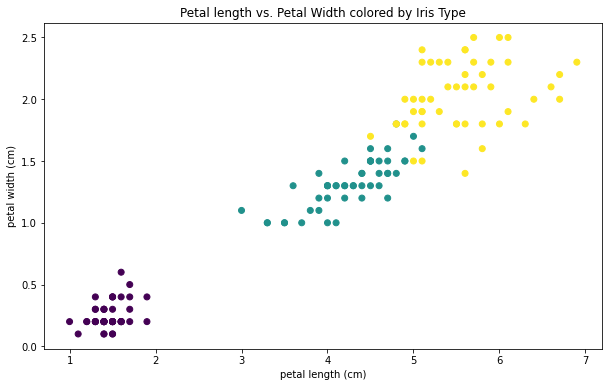

In [ ]:
petal_length = df["petal length (cm)"]
petal_width = df["petal width (cm)"]
iris_class = df["Type"]

plt.figure(figsize=(10,6))
plt.scatter(petal_length, petal_width, c = iris_class)

plt.title("Petal length vs. Petal Width colored by Iris Type")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.show()

### **Step \#3: Split data into training and testing data**
---


In [ ]:
inputs = df[["petal length (cm)","petal width (cm)"]]
output = df[["Type"]]


X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size=0.2, random_state=42)

### **Step #4: Import the ML algorithm from sklearn**
---
 

In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step \#5: Initialize our model and set parameters**
---

Remember to set the *hyperparameter* `n_neighbors`!

In [ ]:
# initialize
model = KNeighborsClassifier(n_neighbors = 3)

### **Step \#6: Fit model on training set**
---

In [ ]:
# fit
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

### **Step \#7: Test the model**
---


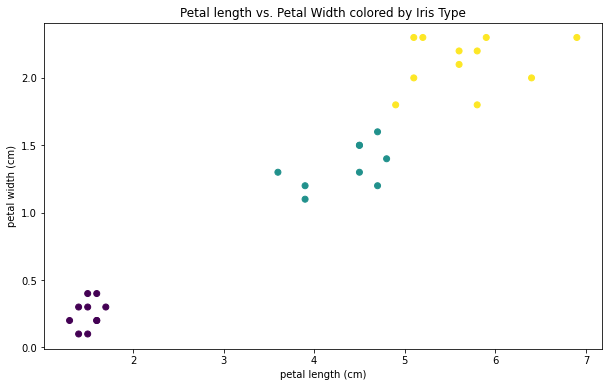

In [ ]:
# predict
pred = model.predict(X_test)


# visualize these predictions
petal_length = X_test['petal length (cm)']
petal_width = X_test['petal width (cm)']
iris_class = pred

plt.figure(figsize=(10,6))
plt.scatter(petal_length, petal_width, c = iris_class)

plt.title("Petal length vs. Petal Width colored by Iris Type")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.show()

### **Step \#8: Make predictions**
---


1. We are given an iris with petal length `1.9` cm and petal width `0.25` cm. What type of iris does your model predict this is?

In [ ]:
mystery_iris = pd.DataFrame([[1.9, 0.25]], columns = ["petal length (cm)", "petal width (cm)"])

prediction = model.predict(mystery_iris)

print(prediction)

[0]


2. Now, we are given an iris with petal length `6.5` cm and petal width `2.1` cm. What type of iris does your model predict this is?

In [ ]:
mystery_iris = pd.DataFrame([[6.5, 2.1]], columns = ["petal length (cm)", "petal width (cm)"])

prediction = model.predict(mystery_iris)

print(prediction)

[2]


3. Lastly, we are given an iris with petal length `2.5` cm and petal width `0.9` cm. What type of iris does your model predict this is?

In [ ]:
mystery_iris = pd.DataFrame([[2.5, 0.9]], columns = ["petal length (cm)", "petal width (cm)"])

prediction = model.predict(mystery_iris)

print(prediction)

[1]


## **Part 2: Independent Work**
---

The following dataset describes the top hits of 2000 - 2019 on Spotify. There is a lot of information for each song such as the tempo, key, energy, loudness, and more.

One piece of information about each song is whether is was in the top or bottom half of these hits. This is marked by the `top half` column. If a song was in the top half of all these hits then `top half = 1`, otherwise `top half = 0`. `top half` will be the target for your KNN model in this part.

The variables you will use to classify a song as a Top Half hit or not will be the `key` and `energy` of the song.

Your code for this part will look very similar to the code we wrote above. Make sure to look at this as much as you need!

### **Step \#0: Import libraries**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics

### **Step \#1: Load in data**
---

**Run the code below to load in the data. Take a moment to familiarize yourself with the general layout.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQJ9UIsI2j8vPnefdBj6GIrUGiDMsF5HRVAg4rsfaZqX5fAoTGLGydLvPXPQvE5ZSo9_aet1SC5UQji/pub?gid=1132556054&single=true&output=csv"
spotify_df = pd.read_csv(url)

spotify_df.head()

,artist,song,duration_ms,year,top half,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit,explicity binary
0,Britney Spears,Oops!...I Did It Again,211160,2000,1,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,False,0
1,blink-182,All The Small Things,167066,1999,1,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",False,0
2,Faith Hill,Breathe,250546,1999,1,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",False,0
3,Bon Jovi,It's My Life,224493,2000,1,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",False,0
4,*NSYNC,Bye Bye Bye,200560,2000,1,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,False,0


### **Step \#2: Decide which features to base our classification on**
---
##### *Decide which columns/variables you want to use to predict the class of the song*

For this week, we will provide you with choices, but it's still good to see when we would make this decision. For this part, look at the `key` and `energy` columns.


Let's visualize this data in the cell below to see if there's any obvious correlation between these variables and whether a song is a top or bottom half hit.

**Run the code below to create this visualization.**

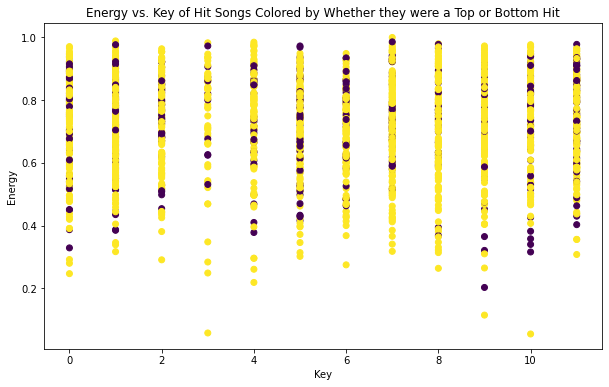

In [ ]:
key = spotify_df["key"]
energy = spotify_df["energy"]
top_half = spotify_df["top half"]

plt.figure(figsize=(10,6))
plt.scatter(key, energy, c = top_half)

plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

**NOTE**: Even if correlations are not obvious, machine learning models may be able to detect correlations nonetheless! Let's see if that's the case here.

### **Step \#3: Split data into training and testing data**
---

**Complete the code below to split your dataset based on the variables we are interested in here:**

- `key`
- `energy`
- `top half`

In [ ]:
inputs = spotify_df[['key', 'energy']]
output = spotify_df['top half']


X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size=0.2, random_state=42)

### **Step #4: Import the ML algorithm using sklearn**
---
 

In [ ]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### **Step \#5: Initialize our model and set parameters**
---

Remember to set the *hyperparameter* `n_neighbors`! **In this case, let's use `k = 3` again.**

In [ ]:
# initialize
model = KNeighborsClassifier(n_neighbors = 3)

### **Step \#6: Fit model using training set**
---

** Write code below to fit your model to the training data.**

In [ ]:
# fit
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### **Step \#7: Test the model**
---


**Run the code below to visualize the results of training.**

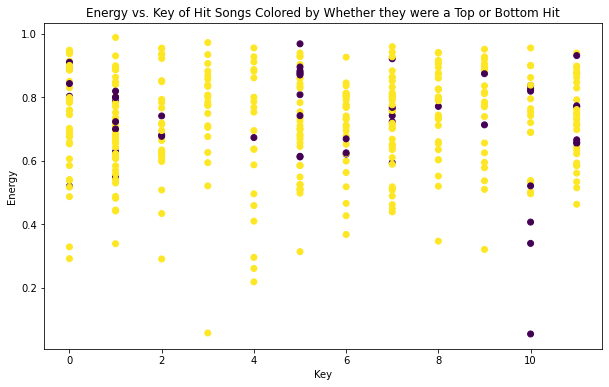

In [ ]:
# predict
pred = model.predict(X_test)

key = X_test["key"]
energy = X_test["energy"]


# visualize these predictions
plt.figure(figsize=(10,6))
plt.scatter(key, energy, c = pred)

plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

### **Step \#8: Make predictions**
---


1. We are given an song with `key = 3` and `energy = 0.8`. According to your KNN model, will this song be in the top half of hits?

**To Check Your Work**: The answer should be yes.

In [ ]:
song = pd.DataFrame([[3, 0.8]], columns = ["key", "energy"])

pred = model.predict(song)
print(pred)

[1]


2. We are given another song with `key = 10` and `energy = 0.2`. According to your KNN model, will this song be in the top half of hits?

**To Check Your Work**: The answer should be no.

In [ ]:
song2 = pd.DataFrame([[10,0.2]], columns = ["key", "energy"])
pred2 = model.predict(song2)
print(pred2)

[0]


3. We are given an song with `key = 1` and `energy = 0.5`. According to your KNN model, will this song be in the top half of hits?

**To Check Your Work**: The answer should be yes.

In [ ]:
song3 = pd.DataFrame([[1,0.5]], columns = ["key", "energy"])
pred3 = model.predict(song3)
print(pred3)

[1]


---

# Copyright 2022 The Coding School, All rights reserved